In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib import colors

from neutronMS import MS_sim, GEN_constQgeom

In [2]:
geom = ('anular', 1.0, 1.3, 4)
geom = ('cuboid', 1, 5, 4)
#geom = ('cylinder', 1, 4)

mus=(0.36, 0.0259)
S_files = ('./data_Sq/Sqw_vanadium/S_mesh.npy', './data_Sq/Sqw_vanadium/Q_vec.npy', './data_Sq/Sqw_vanadium/omega_vec.npy')

## Test of the MS_sim class

In [3]:
ki=6.28
kf=6.28
theta=np.deg2rad(30)

In [4]:
sim = MS_sim(geom, mus, S_files, ki, kf, theta,)
out = sim.run(N=100000, N_bunch=100)

In [5]:
print(sim.Im/sim.Is)

0.30350006586210343


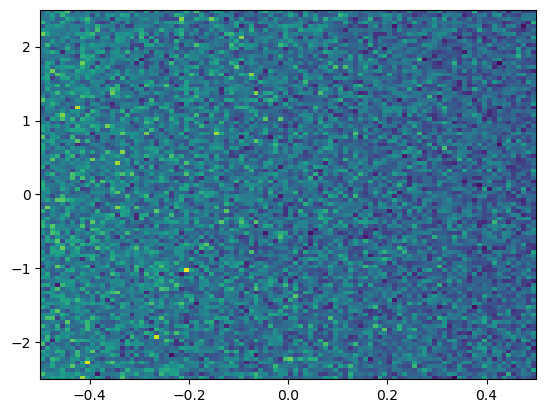

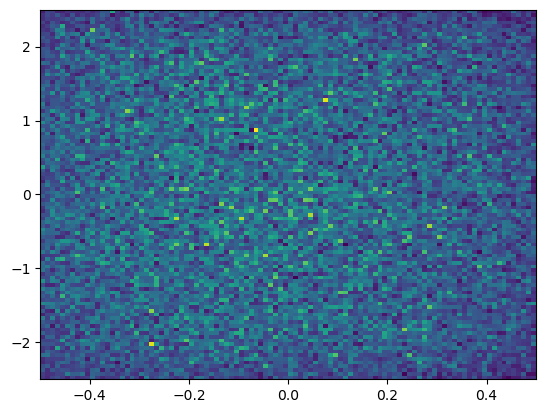

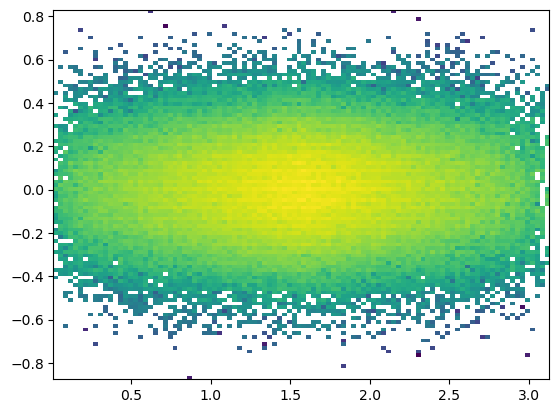

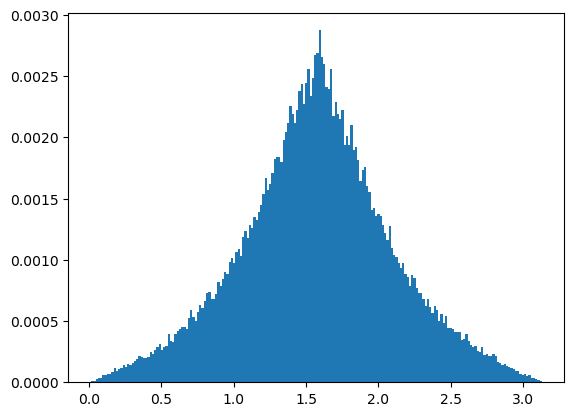

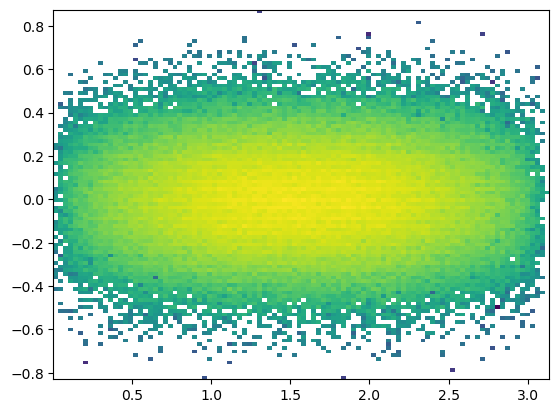

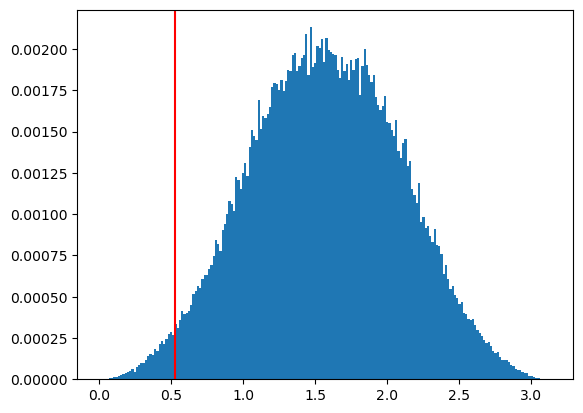

In [6]:
plt.figure()
plt.hist2d(sim.p1[:,0], sim.p1[:,1], bins=100, weights=sim.w1)
plt.figure()
plt.hist2d(sim.p2[:,0], sim.p2[:,1], bins=100, weights=sim.w2)

plt.figure()
plt.hist2d(sim.theta1m, sim.omega1m, weights=sim.wfm, norm=colors.LogNorm(), bins=100);
plt.figure()
plt.hist(sim.theta1m, weights=sim.wfm, bins=200);
plt.figure()
plt.hist2d(sim.theta2m, sim.omega2m, weights=sim.wfm, norm=colors.LogNorm(), bins=100);
plt.figure()
plt.hist(sim.theta2m, weights=sim.wfm, bins=200);
plt.axvline((theta), c='r')

## Loop usage example

In [7]:
######################################
kf = 2*np.pi
omega = np.arange(-30, 30, 1)
Q = 1.5

S_files = ('./data_Sq/Sqw_d-glycerol/S_mesh.npy', './data_Sq/Sqw_d-glycerol/Q_vec.npy', './data_Sq/Sqw_d-glycerol/omega_vec.npy')
mus=(0.37, 0)
######################################

data = GEN_constQgeom('inverse', kf, Q, omega)
data.head()

,omega,Q,ki,kf,Ei,Ef,theta
0,-30,1.5,4.999978,6.283185,4.999978,81.8,0.138698
1,-29,1.5,5.048010,6.283185,5.048010,81.8,0.151264
2,-28,1.5,5.095589,6.283185,5.095589,81.8,0.162117
3,-27,1.5,5.142727,6.283185,5.142727,81.8,0.171617
4,-26,1.5,5.189438,6.283185,5.189438,81.8,0.180011


In [8]:
for i in data.index:
    sim = MS_sim(geom, mus, S_files, data.ki.loc[i], data.kf.loc[i], data.theta.loc[i])
    sim.run(N=100000, N_bunch=40)
    data.loc[i,'Is'] = sim.Is
    data.loc[i,'Im'] = sim.Im

In [9]:
data.loc[:,'Im/Is'] = data.Im/data.Is
data.head(35)

,omega,Q,ki,kf,Ei,Ef,theta,Is,Im,Im/Is
0,-30,1.5,4.999978,6.283185,4.999978,81.8,0.138698,2.128181e-08,1.453411e-07,6.829357
1,-29,1.5,5.048010,6.283185,5.048010,81.8,0.151264,2.509951e-08,1.491855e-07,5.943762
2,-28,1.5,5.095589,6.283185,5.095589,81.8,0.162117,2.922442e-08,1.524915e-07,5.217949
3,-27,1.5,5.142727,6.283185,5.142727,81.8,0.171617,3.370968e-08,1.551161e-07,4.601529
4,-26,1.5,5.189438,6.283185,5.189438,81.8,0.180011,3.871221e-08,1.583678e-07,4.090902
5,-25,1.5,5.235732,6.283185,5.235732,81.8,0.187475,4.431583e-08,1.598279e-07,3.606565
6,-24,1.5,5.281620,6.283185,5.281620,81.8,0.194142,5.072072e-08,1.647160e-07,3.247510
7,-23,1.5,5.327113,6.283185,5.327113,81.8,0.200115,5.809003e-08,1.676486e-07,2.886013
8,-22,1.5,5.372220,6.283185,5.372220,81.8,0.205477,6.687958e-08,1.711973e-07,2.559785
9,-21,1.5,5.416952,6.283185,5.416952,81.8,0.210294,7.803852e-08,1.764188e-07,2.260663


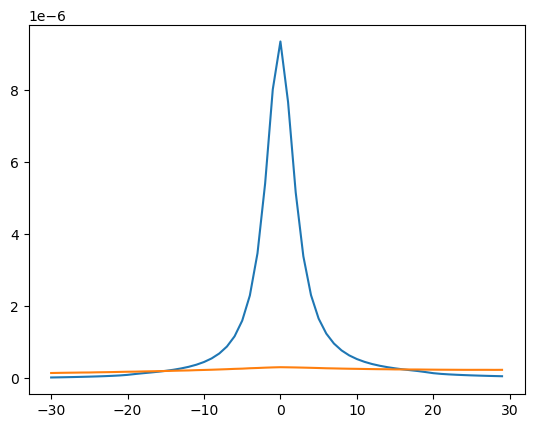

In [10]:
plt.plot(data.omega, data.Is)
plt.plot(data.omega, data.Im)

#plt.yscale('log')

#plt.savefig('anular 11, 13')

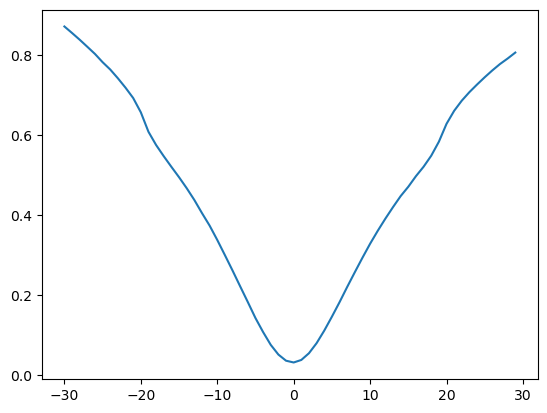

In [11]:
plt.plot(data.omega, data.Im/(data.Is+data.Im))